# Ice fitting workshop - 12/jun/2023

### About ENIIGMA

This Jupyter notebook contains a tutorial of the ENIIGMA fitting tool (Rocha et al. 2021).
Specifically, it shows: 

(I) the steps for continuum determination of the infrared spectrum of protostars;

(II) how to perform the spectral fitting of ice bands using laboratory spectrum;

(III) introduce the statistical analysis after the fit, which covers confidence interval analysis, column density determination and degenacy assessment of the fits.

### Documentation

The ENIIGMA fitting tool has two sources of documentation:

1) Rocha et al. (2021): https://www.aanda.org/articles/aa/abs/2021/10/aa39360-20/aa39360-20.html

2) Readthedocs: https://eniigma-fitting-tool.readthedocs.io/en/latest/


### Installation

You can find the installation steps and the required packages to run ENIIGMA at the "readthedocs" documentation.

### Import modules

As a standard python code, here, you import the modules needed to run the ENIIGMA functions.

In [1]:
import pyevolve
%matplotlib inline
import matplotlib.pyplot as plt
from ENIIGMA.Continuum import Fit
from ENIIGMA.GA import optimize
from ENIIGMA.GA import check_ga
from ENIIGMA.Stats import Pie_chart_plots
from ENIIGMA.Stats import Stats_Module
from ENIIGMA.Stats import Degen_plots
import ENIIGMA

### Genetic algorithm optimization

Once the optical depth is obtained, ENIIGMA performs the spectral fitting using the laboratory data. The function used here is **optimize.ENIIGMA**. The input information are:

1) **filename:** the path to the file containing the optical depth spectrumm;

2) the range to perform the fit;

3) **list_sp:** a list with the initial guess of species to start the fitting;

4) **group_comb:** sets how to group potential solutions to fit the observation data. This informaiton is used in the very last stage of the code.

5) **skip:** when *True* the code performs the fit using only the species included in the *list_sp*. When *False*, ENIIGMA searches for the best combination within the entire ensamble of laboratory data.

6) **pathlib:** when *None* the code uses the standard library of experimental data. Otherwise, users can indicate the path to their own library of data.

7) **ga_max:** sets a limit for the coefficients of the linear combination during the optmization process.


An example is given below:

 
 
|			ENIIGMA CODE				|
| A Python module for the decomposition of IR ice spectra using |
|        laboratory data and genetic modeling algorithm         |
|                   Current Version: V.0                        |
|                         April 2020                            |
DIR: /Users/willrocha/ice_fitting_workshop/
Performing a linear combination of pure ices...
(0, 1, 2)
0
CO_CO2_15Kbs.dat
1
CO.dat
2
H2O_NH3_Schutte.dat
max is 1.0
max is 1.0
max is 1.0
round 1 of 20 Score = 0.239748
(0, 1, 3)
0
CO_CO2_15Kbs.dat
1
CO.dat
3
H2O_CH3OH_8p.dat
max is 1.0
max is 1.0
max is 1.0
round 2 of 20 Score = 0.251669
(0, 1, 4)
0
CO_CO2_15Kbs.dat
1
CO.dat
4
H2O_CH4_10_06_a_V3.dat
max is 1.0
max is 1.0
max is 1.0
round 3 of 20 Score = 0.259088
(0, 1, 5)
0
CO_CO2_15Kbs.dat
1
CO.dat
5
CO_CH3OH_4_1_15K_bs.dat
max is 1.0
max is 1.0
max is 1.0
round 4 of 20 Score = 0.683132
(0, 2, 3)
0
CO_CO2_15Kbs.dat
2
H2O_NH3_Schutte.dat
3
H2O_CH3OH_8p.dat
max is 1.0
max is 1.0
max is 1.0
round 5 of 20 S

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

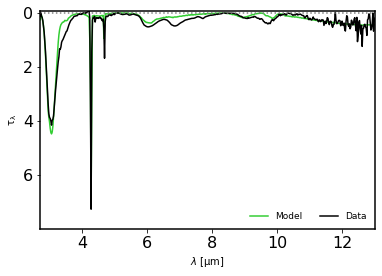

In [2]:
filename = 'Removed_silicate_spectrum.txt'
list_sp_skipTrue = ['CO', 'CO_CH3OH_4_1_15K_bs', 'H2O_CH3OH_8p', 'CO_CO2_15Kbs', 'H2O_CH4_10_06_a_V3', 'H2O_NH3_Schutte']

optimize.ENIIGMA(filename, 2.7, 13.0, list_sp_skipTrue, group_comb=3, skip=True, pathlib = None, ga_max = 5.5)

### Statistical analisys

This is the third and last module of the ENIIGMA fitting tool. We show here how to use ENIIGMA's functionalities to evaluate the goodness of the fit.

#### Pie chart

This is feature aims at ranking the best solutions based on their statistical significance. Specifically, ENIIGMA calculates how frequent (recurrent) is a specific laboratory data inside a given confidence interval. For example, if the recurrence is 100%, this means that this data is present in all solutions. When the recurrence drops, say 80%, it means that the data is still significant, but there are solutions where it is not used.

To create Pie Chart plots, one can use the function **Pie_chart_plots.pie**. This function requires the input of the parameter *sig_level*. This means the $sigma$ confidence interval required by the user.

An example is given below:

Creating pie chart...


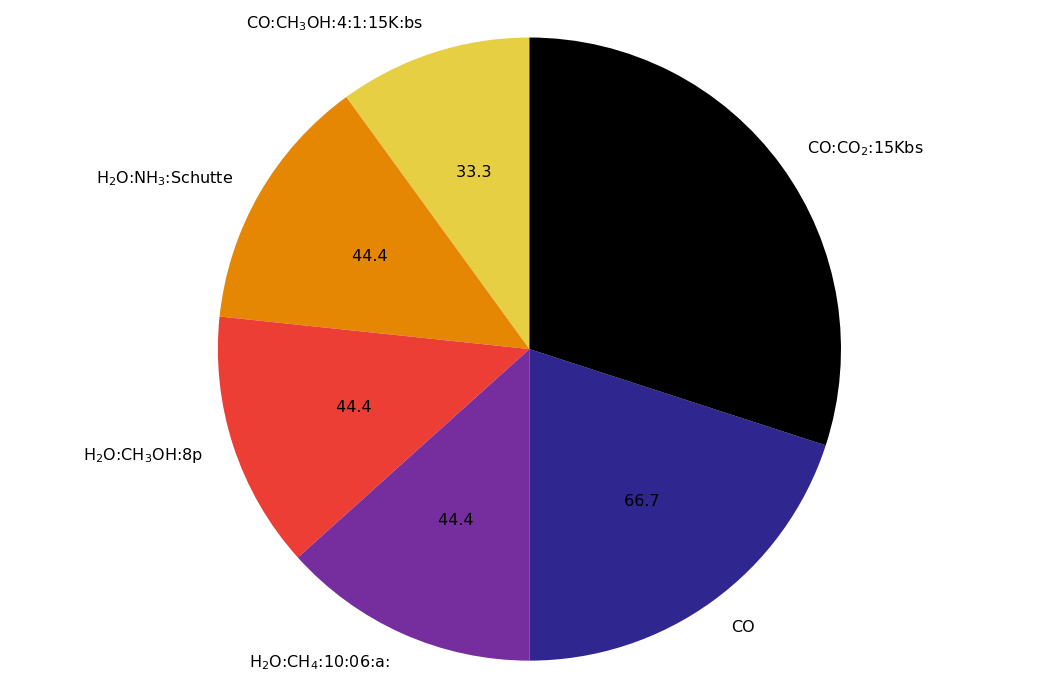

In [5]:
Pie_chart_plots.pie(sig_level=0.1)

#### Confidence intervals and column density determination

Here, ENIIGMA calculates the confidence intervals of the coefficients in the **best** solution. A few plots are created as output, which are described below in the sequence they appear:

1) Corner (triangle) plot: shows the correlations among all coefficients based on a $\chi^2$ analysis. In this case the confidence intervals are a function of the number of free parameters, not the goodness of the fit itself (see details in Avni & Bahcall 1980).

2) A plot with the best fit, and how it changes when the upper and lower confidence limits of the coefficients are adopted.

3) The best fit and the components overploted on the observational data. The residual fit is also shown.

4) A bar plot showing the column densities. **Note:** This only applies to the data included in the standard ENIIGMA library. If you uses your own library, ENIIGMA will not recognize, and consequently, no column density will be determined.

		RUNNING STATISTICAL MODULE
Generated chi2 values: 201.5268260164463
Generated chi2 values: 91.16013802090401
Generated chi2 values: 83.41569778708563
Generated chi2 values: 54.55873853383472
Generated chi2 values: 84.71521614838072
Generated chi2 values: 115.52697690696576
Generated chi2 values: 51.430034960768396
Generated chi2 values: 171.58332217451633
Generated chi2 values: 85.27614962809031
Generated chi2 values: 244.89721049764125
Generated chi2 values: 239.96672922825377
Generated chi2 values: 197.7154289755199
Generated chi2 values: 89.83295089773554
Generated chi2 values: 265.5895603256422
Generated chi2 values: 89.99176626142919
Generated chi2 values: 330.08320161663795
Generated chi2 values: 220.44656638327905
Generated chi2 values: -173.1221096975303
Generated chi2 values: 748.4167465832711
Generated chi2 values: 1697.252584231958
Generated chi2 values: 82.39194243684435
Generated chi2 values: 87.4403595300932
Generated chi2 values: 131.54730990096186
Generated chi2 value

Generated chi2 values: 86.76047883784122
Generated chi2 values: 140.00954076852526
Generated chi2 values: 118.23337187549731
Generated chi2 values: 128.99210995501687
Generated chi2 values: 502.6829470396762
Generated chi2 values: 524.6854628184857
Generated chi2 values: -20.36729327855788
Generated chi2 values: 106.3568803947214
Generated chi2 values: 62.45469113436256
Generated chi2 values: 134.16867764195757
Generated chi2 values: 108.05182731930239
Generated chi2 values: 84.37807627444482
Generated chi2 values: 85.87248030211506
Generated chi2 values: 565.101959400351
Generated chi2 values: 79.77278673477417
Generated chi2 values: 79.19298832708289
Generated chi2 values: 127.71886449554404
Generated chi2 values: 84.99666585291499
Generated chi2 values: 10.495466307706913
Generated chi2 values: 53.232267859600626
Generated chi2 values: 92.94997547688106
Generated chi2 values: 89.54441976739247
Generated chi2 values: 287.0019614433365
Generated chi2 values: 244.6290391680619
Generate

Generated chi2 values: -21.352617205458884
Generated chi2 values: -2331.779183763744
Generated chi2 values: 555.6070658410334
Generated chi2 values: 87.62900126178522
Generated chi2 values: 121.41068859212231
Generated chi2 values: 158.54420192691498
Generated chi2 values: 118.60336922237619
Generated chi2 values: 3968.7500238530947
Generated chi2 values: 103.74515231740314
Generated chi2 values: 137.67120505823812
Generated chi2 values: 221.18966793104704
Generated chi2 values: 131.30171976499776
Generated chi2 values: 124.88594280392655
Generated chi2 values: 84.0775118741291
Generated chi2 values: 98.62802262785206
Generated chi2 values: 110.42116951052543
Generated chi2 values: 142.57378192006948
Generated chi2 values: 103.55313957934709
Generated chi2 values: 109.333524754293
Generated chi2 values: -50.69173479715914
Generated chi2 values: 119.35158602587363
Generated chi2 values: 123.75645774807336
Generated chi2 values: 102.46793945451758
Generated chi2 values: 263.0279810243946

Generated chi2 values: 789.2944908403405
Generated chi2 values: 100.42450848659763
Generated chi2 values: 232.55316826493177
Generated chi2 values: 92.00071844532286
Generated chi2 values: 94.26895701975914
Generated chi2 values: 147.73516492258102
Generated chi2 values: 144.11974386446718
Generated chi2 values: 106.11890177666766
Generated chi2 values: 96.32951057966696
Generated chi2 values: 239.5273524241564
Generated chi2 values: 210.8628132783292
Generated chi2 values: 160.3264391602793
Generated chi2 values: 176.83670545242094
Generated chi2 values: 244.8152607437284
Generated chi2 values: 85.86288698145069
Generated chi2 values: 1356.287844878941
Generated chi2 values: 129.47807174151825
Generated chi2 values: 203.81935553090867
Generated chi2 values: 454.6465199855977
Generated chi2 values: 94.94714707652038
Generated chi2 values: 266.9070137927396
Generated chi2 values: 155.33188657366955
Generated chi2 values: 313.95829898294323
Generated chi2 values: 283.08117267632844
Gener

Generated chi2 values: 208.91649698926
Generated chi2 values: 284.75940368534793
Generated chi2 values: 528.7889144132296
Generated chi2 values: 219.00458774392536
Generated chi2 values: 99.67393039147596
---------------------------------------------------
Making upper and lower confidence intervals...
---------------------------------------------------
---------------------------
Making deconvolution plot...
---------------------------
-----------------------------
Performing deconvolutions...
I am here!!
-----------------------------
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
		Created by the ENIIGMA Team
		ENIIGMA code V.0 - April 2020


<Figure size 432x288 with 0 Axes>

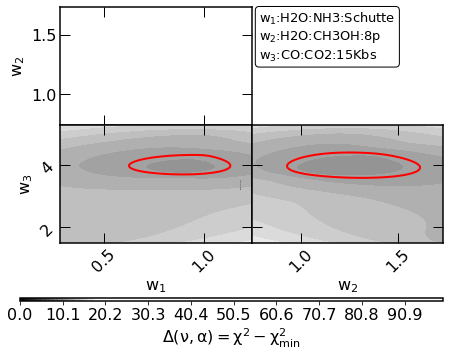

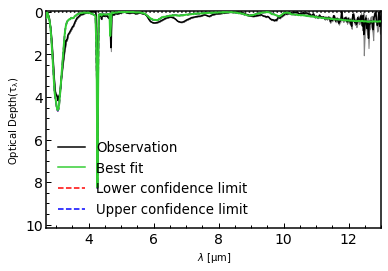

<Figure size 432x288 with 0 Axes>

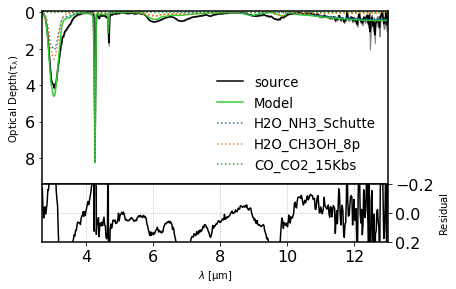

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
Stats_Module.stat(f_sig=0.5)

#### Mean column density determination

Ice fitting is not straightforward, and there are degeneracies intrinsic to the process. ENIIGMA provides a way to determine the mean ice column densities when all solutions (including the best solution) are taken into account. This can be done using the function **Degen_plots.merge_components**. 

As output, bar plots are shown containing the mean column densities, and the lower and upper limits.

An example is given below:

In [7]:
Degen_plots.merge_components_cd()

-------------------------------------------------------------------------
Searching for combinations inside 3 sigma confidence interval...
-------------------------------------------------------------------------
-------------------------------------------------------------------------
8  combinations found inside 3 sigma confidence interval

Deconvolving components and merging column densities...

Creating file: All_merge_final.csv
-------------------------------------------------------------------------
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing H2O_CH3OH_8p
Decomposing CO
Decomposing H2O_CH4_10_06_a_V3
Decomposing H2O_CH3OH_8p
Decomposing CO
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing CO_CO2_15Kbs
Decomposing CO
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing H2O_CH4_10_06_a_V3
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_CH3OH_8p
Decompos

/Users/willrocha/ice_fitting_workshop/ENIIGMA/Stats/Degen_plots.py:217: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df = pd.concat(list(map(pd.read_csv, glob.glob(os.path.join('', "output_*.csv")))),


---------------------------------------
Making Fig_comb_hist.pdf...
---------------------------------------


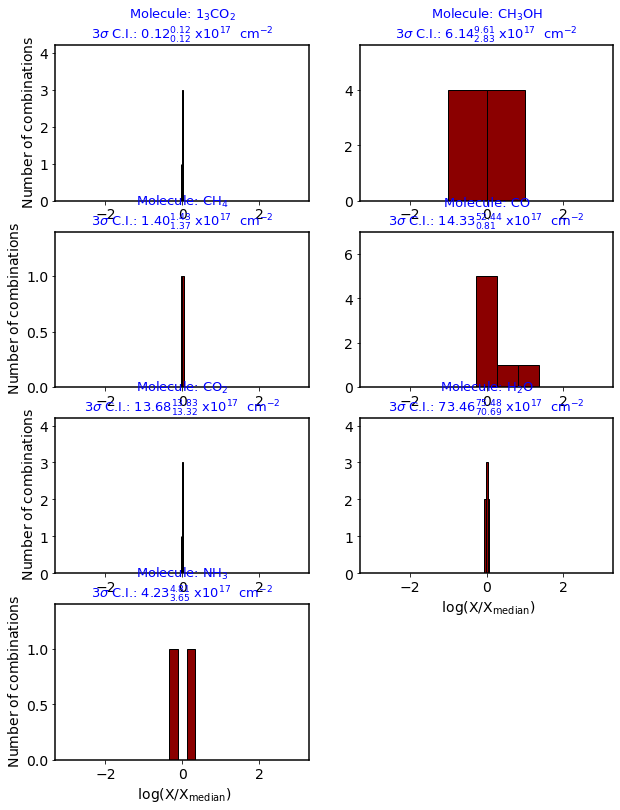

In [8]:
Degen_plots.hist_plot()